### 

# <center> Regressão Linear

___

## Objetivo

Este material busca trazer uma visão geral sobre os modelos de regressão linear explorando as formas de estimação e variações do modelo quanto à forma fucional e regularizações ou restrições..

## Definição e premissas

A regressão linear é um método estatístico em que se explora a relação linear existente entre variáveis de tal modo que seja possível fazer previsões por meio de inferências estatísticas. O modelo é estimado utilizando métodos estatísticos que minimizam os erros de previsão. 

O modelo assume a normalidade dos dados e se as premissas de Gauss Markov forem atendidas, a estimação dos parâmetros pelo método dos Mínimos Quadrados Ordinários resulta no melhor estimador linear não viesado. 

##### Premissas de Gauss Markov:

    1) Amostragem aleatória
    2) O modelo é linear nos parâmetros
    3) A variância em X não é nula
    4) Colineriadade imperfeita 
    5) A média condicional dos resíduos é zero (o valor esperado dos erros é zero)
    6) Heterocedasticidade (a variância dos resíduos é constante)
    7) Ausência de correlação entre os resíduos
    
O fato de o modelo assumir que os erros possuem uma distribuição normal com média zero e variância constante (hipóteses 5 e 6) implica que em torno do valor estimado existe uma distribuição normal e que o valor observado é uma realização dessa distribuição centrada na reta. Logo, o valor observado tem uma probabilidade de estar longe da reta, ou seja, longe do valor previsto. Porém, a probabilidade de estar sobre a reta é maior, pois estando centrada na reta, a média, mediana e moda estarão sobre a reta.

___

## Imports

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

___

In [2]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

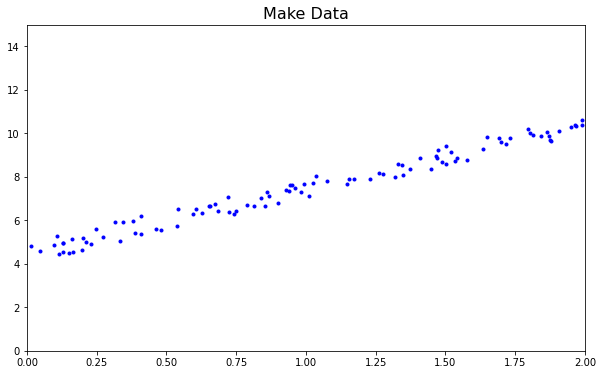

In [3]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.title('Make Data', fontsize = 16)
plt.show()

Os modelos de regressão linear buscam estimar os parâmetros de uma equação linear que minimiza os erros de previsão. Esses parâmetros são econtrados calculando a soma ponderada das características de entrada mais o viés (constante).

Predição do modelo de regressão linear

### $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + ... + \hat{\beta_{n}}x_{n} $

Forma vetorizada

### $ \hat{y} = h_{\beta}(x) = \beta x  $

___

# <center> Estimação dos Parâmetros

## 1 - Modelo fechado

### $ \hat{\beta}  = (X^{T}X)^{-1} X^{T} y $

In [4]:
# Add constant to matriz X
X_b = np.c_[np.ones((100,1)), X]

# Calculate the vector with the parameters
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# View
beta

array([[4.48290575],
       [2.96537475]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Predict
y_predict = X_new_b.dot(beta)
y_predict

array([[ 4.48290575],
       [10.41365525]])

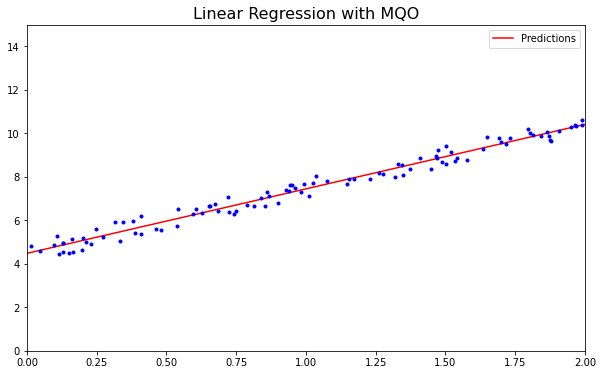

In [6]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.title('Linear Regression with MQO', fontsize = 16)
plt.legend()
plt.show()

### Usando sklearn

In [7]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.48290575]), array([[2.96537475]]))

In [8]:
# Predict 
lin_reg.predict(X_new)

array([[ 4.48290575],
       [10.41365525]])

### Usando numpy

In [9]:
# A classe LinearRegression é baseada na classe scipy.linalg.lstsq()
beta_svd =  np.linalg.lstsq(X_b, y, rcond = 1e-6)
beta_svd[0]

array([[4.48290575],
       [2.96537475]])

Essa função usa o pseudoinverso de X de Moore-Penrose. Essa abordagem elimina os problemas de matrizes sem inversa, de m < n e colinearidade perfeita.

### $ \hat{\beta}  = X^{+} y $


A ideia é decompor a matriz de treinamento $X$ no produto entre três matrizes.
### $ X^{+} = V \sum^{+}U^{T}  $

Para calcular $\sum^{+}$ define-se como zero todos os valores menores que um pequeno valor de  limiar, substitui os demais valores pelo inverso e transpõe a matriz resultante.

In [10]:
# Aplicando o pseudoinverso com numpy
np.linalg.pinv(X_b).dot(y)

array([[4.48290575],
       [2.96537475]])

## 2- Gradient Descent

O objetivo é ajustar iterativamente os parâmetros com o intuito de minimizar uma função de custo.

A analogia mais comum sobre o gradiente descendente é imaginar-se no topo de uma montanha e que você precisa descer o mais rápido até o fim do vale. Além disso, você não congue ver a ancosta, só pode sentir o declive abaixo dos pés. A estratégia seria sentir o declive em todos os lados e seguir o mais íngreme.

O algoritmo calcula o gradiente local da função de erro em relação ao vetor de parâmetros e segue em direção ao gradiente descendente. Quando o gradiente for zero encontramos o mínimo. 

**Parâmetros e características:**

    * Taxa de aprendizado: É o tamanho das etapas ou dos passos que o algoritmo dá em busca do mínimo. Se for muito pequeno o algoritmo precisa de muitas iterações até encontar o mínimo. Se for muito grande pode passar do mínimo e acabar em um ponto mais alto do que estava quando começou.
    
    * Forma da função de custo: Quando a função é uma parábola convexa, iniciar pela esquerda ou direita não fará diferença e o modelo caminha direto para o único mínimo da função. Caso a função tenha mínimos locais, o que seria equivalente a encontrar buracos durante a descida da montanha, a solução encontrada pode não ser ótima, pois buscado é o mínimo global da função. Caso a função tenha uma baixa inclição, precisamos de um grande número de iterações para atravessar o platô. Aumentar a taxa de aprendizado pode ser uma solução, mas em excesso, como já mencionamos, podemos passar do mínimo global e não encontrar uma boa solução.
    
    
A função de custo MSE é uma função convexa sem mínimos locais, ou seja, há apenas um mínimo global. Isso facilita a estimação dos parâmetros e o resultado encontrado converge para os resultados encontrados pelos modelos anteriores.

## GD em batch (lote)

### $ \triangledown_{\beta}MSE(\beta) = \frac{2}{m} X^{T}(X\beta - y)  $

### $ \beta(next) = \beta - \eta * \triangledown_{\beta}MSE(\beta) $

In [11]:
# Taxa de aprendizado
eta = 0.1

# Núm de iterações
n_iterations = 1000
m = 100

# Inicialização aleatória
beta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradients
    
# view
beta

array([[4.48290575],
       [2.96537475]])

## GD estocástico

Um dos problemas da aplicação do GD em batch é que ele usa todo o conjunto de dados de treinamento para calcular os gradientes em cada etapa, tornando o processo de treinamento mais lento. O GD estocástico trabalha no outro extremo, selecionando uma instância aleatória no conjunto de treinamento a cada etapa e calculando os grandientes baseados nessa única instância selecionada.

Devido a aleatriedade do processo esse algoritmo não desce regular e suavemente até o mínimo, ele desce na media e terminará muito próximo do mínimo nunca se estabilizando. Caso a função de custo seja irregular, contendo mínimos locais, o GD estocástico tem maior chance de encontrar o mínimo global em comparação com o GD em batch.

Em resumo, o GD estcástico é uma solução para o problema dos mínimos locais, porém o modelo pode nunca estabilizar no mínimo. Uma solução seria reduzir gradualmente a taxa de aprendizado. Uma taxa alta no início possibilitaria o modelo escapar dos mínimos locais e uma taxa baixa no final permitiria o modelo estabilizar no mínimo global.

In [12]:
# Número de iterações
m = 100

# Número de rodadas
n_epochs = 50

# Hiperparâmetros do cronograma de aprendizado
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

# Inicialização aleatória
beta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(beta) - yi)
        eta = learning_schedule(epoch * m + i)
        beta = beta - eta * gradients
        
# View
beta

array([[4.45624644],
       [2.96667446]])

### Usando sklearn

In [13]:
# import
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.46376239]), array([2.97767]))

___


# <center> Regressão Polinomial

Uma das premissas de Gauss-Markov é que o modelo precisa ser linear nos parâmetros. Portanto, o modelo pode ser não linear nas variáveis. Como exemplo temos algumas formas funcionais de variáveis bem conhecidas como o lucro sendo uma função quadrática e formando uma parábola côncava e a função de custo como uma equação de terceiro grau. 

## Forma quadrática

In [14]:
# Equação quadrática simples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = -0.5 * X**2 + X + 2 + np.random.randn(m, 1)

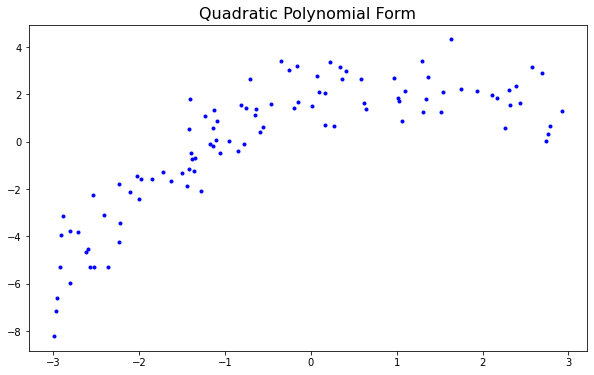

In [15]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.title('Quadratic Polynomial Form', fontsize = 16)
plt.show()

É evidente que a forma funcional é quadrática. Podemos usar o sklearn para adicionar o quadrado a cada variável

In [16]:
# add **
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [17]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98707683]), array([[ 1.08300628, -0.51345665]]))

In [18]:
# Predict
predict = lin_reg.predict(X_poly)

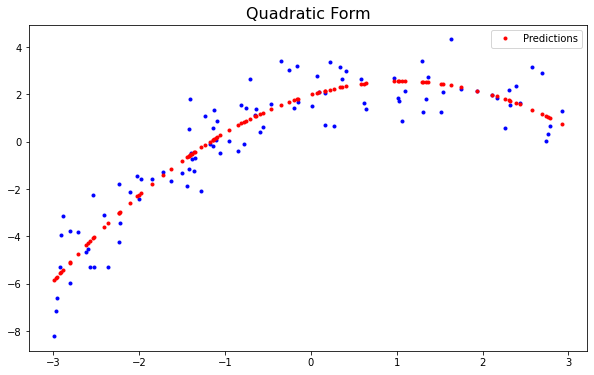

In [19]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.plot(X, predict, 'r.', label = 'Predictions')
plt.title('Quadratic Form', fontsize = 16)
plt.legend()
plt.show()

## Forma cúbica

In [20]:
# Equação quadrática simples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

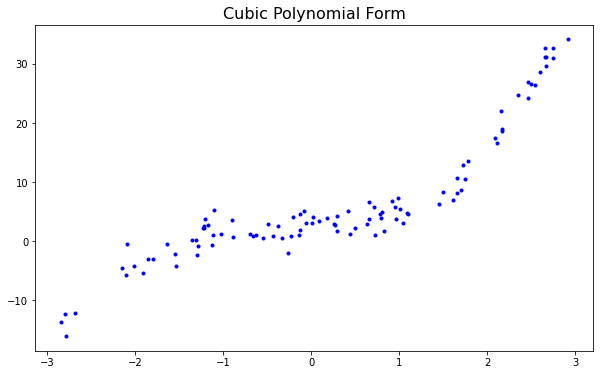

In [21]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.title('Cubic Polynomial Form', fontsize = 16)
plt.show()

É evidente que a forma funcional é quadrática. Podemos usar o sklearn para adicionar o quadrado a cada variável

In [22]:
# add **
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [23]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.24185168]), array([[0.88733882, 0.97131453, 0.98530476]]))

In [24]:
# Predict
predict = lin_reg.predict(X_poly)

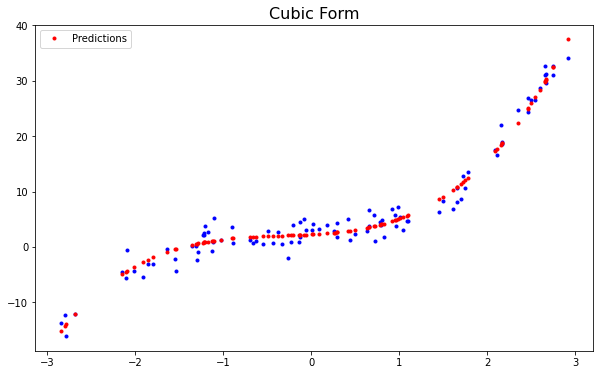

In [25]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.plot(X, predict, 'r.', label = 'Predictions')
plt.title('Cubic Form', fontsize = 16)
plt.legend()
plt.show()

___

## Curvas de Aprendizado e Trade-off Viés/Variância

O erro de generalização de um modelo pode ser expresso como a soma de três erros distintos:

***Viés:***

    * Este erro se deve a suposições erradas sobre o modelo, como a forma funcional por exemplo. Um alto viés pode resultar em um modelo subajustado.
    
***Variância*** 

    * Este erro se deve ao excesso de sensibilidade do modelo a pequenas variações nos dados de treino. Um modelo com muitos graus de liberdade, como um modelo polinomial de alto grau, pode ter alta variância e se sobreajustar aos dados.
    
    
***Erro irredutível***

    * São os ruídos dos dados. Para reduzí-lo podemos limpar os dados e/ou melhorar a fonte.

*Aumentar a complexidade do modelo aumenta a variância e reduz o viés e vice-versa.*

    * Alto viés: Modelo subajustado
    * Alta Variância: Modelo sobreajustado

In [26]:
# Create some data
m = 100
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # PLot
    plt.figure(figsize = (10,6))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.title('Viés/Variância', fontsize = 16)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

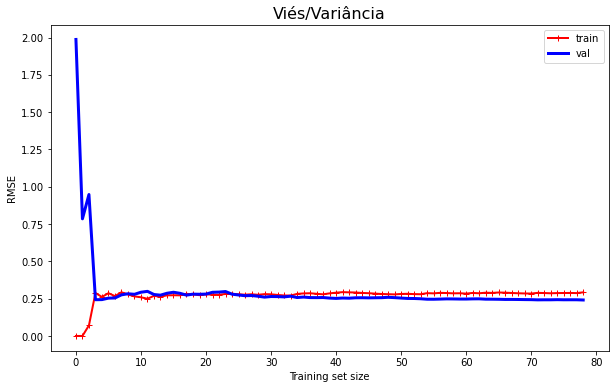

In [28]:
# model
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)

___

# <center> Modelos Regularizados

Uma maneira de reduzir o sobreajuste é regularizar ou restringir o modelo. Em casos de modelos polinomiais uma forma simples de restringir é reduzir o grau. Já em modelos lineares a regularização pode ser obtida restringindo os pesos do modelo.

A maioria dos modelos de regularização são sensíveis a escala dos dados, portanto, é essencial que o dados sejam escalonados antes de aplicar algum modelo de regressão regularizado.

# Ridge Regression

A regressão ridge adiciona um termo de regularização à regressão linear. O parâmetro adicionado é o somatório do quadrado dos pesos.


### $ J(\beta) = MSE(\beta) + \alpha\frac{1}{2}\sum_{i = 1}^{n}\beta_{i}^{2}   $


### $ \hat{\beta}  = (X^{T}\alpha X)^{-1} X^{T} y $

In [29]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [30]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Modelo linear

In [31]:
# import
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ridge alpha 0
ridge_reg0 = Ridge(alpha = 0, solver = 'cholesky').fit(X_std, y)

# ridge alpha 
ridge_reg01 = Ridge(alpha = -20, solver = 'cholesky').fit(X_std, y)

# ridge alpha 
ridge_reg1 = Ridge(alpha = 20, solver = 'cholesky').fit(X_std, y)

In [32]:
# predict
predict = linear_reg.predict(X_std)
predict0 = ridge_reg0.predict(X_std)
predict01 = ridge_reg01.predict(X_std)
predict1 = ridge_reg1.predict(X_std)

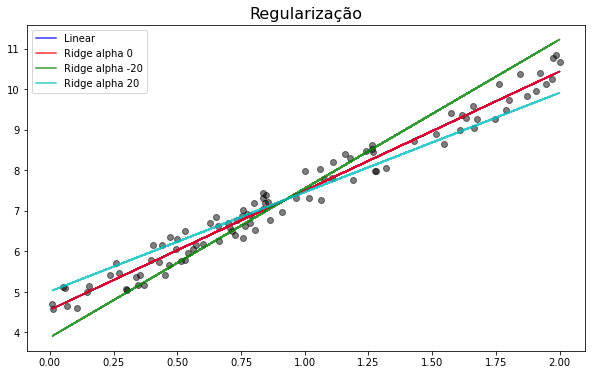

In [33]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.8)
plt.plot(X, predict0, 'r-', label = 'Ridge alpha 0', alpha = 0.8)
plt.plot(X, predict01, 'g-', label = 'Ridge alpha -20', alpha = 0.8)
plt.plot(X, predict1, 'c-', label = 'Ridge alpha 20', alpha = 0.8)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

Quando alpha = 0, a regularização desaparece e retornamos ao modelo de regressão linear.

### Modelo polinomial

In [34]:
# Equação quadrática simples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [35]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [36]:
# import
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# ridge alpha 
ridge_reg0 = Ridge(alpha = -5, solver = 'cholesky').fit(XPoly_std, y)

# ridge alpha
ridge_reg01 = Ridge(alpha = 100, solver = 'cholesky').fit(XPoly_std, y)

In [37]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = ridge_reg0.predict(XPoly_std)
predict01 = ridge_reg01.predict(XPoly_std)

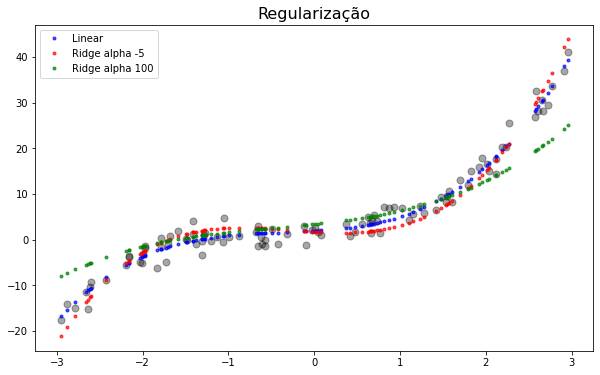

In [38]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 14, alpha = 0.35)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Ridge alpha -5', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Ridge alpha 100', alpha = 0.7)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___

# Lasso Regression

A regressão lasso também adiciona um termo de regularização à regressão linear. O termo adicionado é somatório do módulo dos pesos.

### $ J(\beta) = MSE(\beta) + \alpha\sum_{i = 1}^{n}|\beta_{i}|   $


#### $ \triangledown_{\beta}MSE(\beta) = \frac{2}{m} X^{T}(X\beta - y)  $


### $ g(\beta, J) = \triangledown_{\beta}MSE(\beta) + \alpha \begin{pmatrix} sign(\beta_{1}) \\ sign(\beta_{2}) \\ ... \\ sign(\beta_{n}) \end{pmatrix} $ quando $ sign(\beta_{i}) = \begin{cases} -1 & if \beta_{i} < 0 \\ 0 & if \beta_{i} = 0\\ +1 & if \beta_{i} > 0 \end{cases}$ 

In [39]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [40]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Modelo linear

In [41]:
# import
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ridge alpha 0
lasso_reg0 = Lasso(alpha = 0).fit(X_std, y)

# ridge alpha
lasso_reg01 = Lasso(alpha = -2).fit(X_std, y)

# ridge alpha
lasso_reg1 = Lasso(alpha = -1).fit(X_std, y)

In [42]:
# predict
predict = linear_reg.predict(X_std)
predict0 = lasso_reg0.predict(X_std)
predict01 = lasso_reg01.predict(X_std)
predict1 = lasso_reg1.predict(X_std)

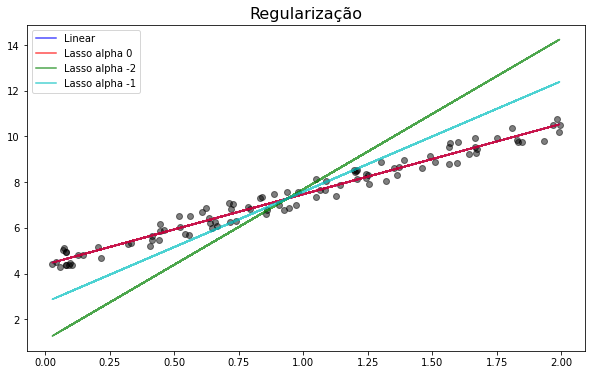

In [43]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r-', label = 'Lasso alpha 0', alpha = 0.7)
plt.plot(X, predict01, 'g-', label = 'Lasso alpha -2', alpha = 0.7)
plt.plot(X, predict1, 'c-', label = 'Lasso alpha -1', alpha = 0.7)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

Quando alpha = 0, a regularização desaparece e retornamos ao modelo de regressão linear.

### Modelo polinomial

In [44]:
# Equação quadrática simples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [45]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [46]:
# import
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# lasso alpha
lasso_reg0 = Lasso(alpha = -1).fit(XPoly_std, y)

# lasso alpha
lasso_reg01 = Lasso(alpha = 5).fit(XPoly_std, y)

In [47]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = lasso_reg0.predict(XPoly_std)
predict01 = lasso_reg01.predict(XPoly_std)

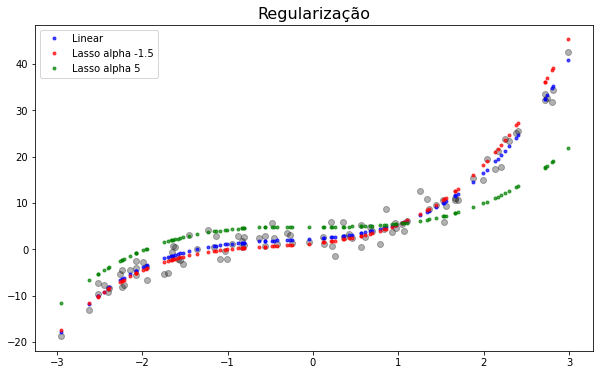

In [48]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.3)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Lasso alpha -1.5', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Lasso alpha 5', alpha = 0.7)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___

# Elastic Net Regression

A regressão elastic net combina as regularizações ridge e lasso, permitindo que o peso de cada uma seja controlado.

$ J(\beta) = MSE(\beta) + r\alpha\sum_{i = 1}^{n}|\beta_{i}| + \frac{1 - r}{2}\alpha\sum_{i = 1}^{n}\beta_{i}^{2}   $

In [49]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [50]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Modelo linear

In [51]:
# import
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ElasticNet alpha 0
elastic_reg0 = ElasticNet(alpha = 0).fit(X_std, y)

# ElasticNet alpha -1
elastic_reg01 = ElasticNet(alpha = -1).fit(X_std, y)

# ElasticNet alpha 1
elastic_reg1 = ElasticNet(alpha = 1).fit(X_std, y)

In [52]:
# predict
predict = linear_reg.predict(X_std)
predict0 = elastic_reg0.predict(X_std)
predict01 = elastic_reg01.predict(X_std)
predict1 = elastic_reg1.predict(X_std)

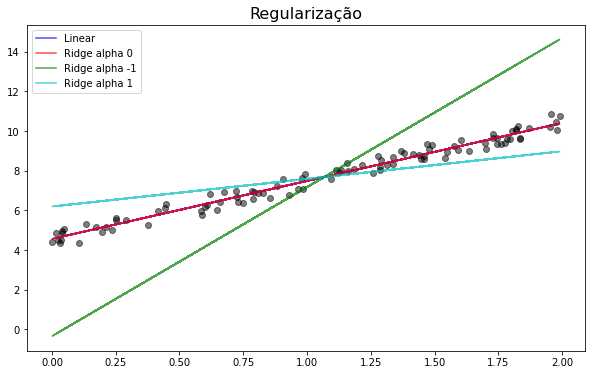

In [53]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r-', label = 'Ridge alpha 0', alpha = 0.7)
plt.plot(X, predict01, 'g-', label = 'Ridge alpha -1', alpha = 0.7)
plt.plot(X, predict1, 'c-', label = 'Ridge alpha 1', alpha = 0.7)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

Quando alpha = 0, a regularização desaparece e retornamos ao modelo de regressão linear.

### Modelo polinomial

In [54]:
# Equação quadrática simples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [55]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [56]:
# import
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# ElasticNet alpha 0
elastic_reg0 = ElasticNet(alpha = -0.1).fit(XPoly_std, y)

# ElasticNet alpha -1
elastic_reg01 = ElasticNet(alpha = 1).fit(XPoly_std, y)

In [57]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = elastic_reg0.predict(XPoly_std)
predict01 = elastic_reg01.predict(XPoly_std)

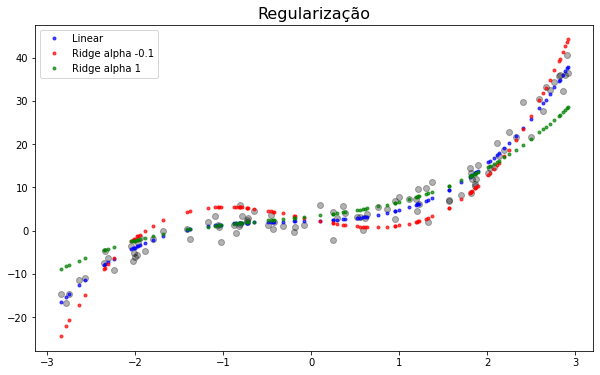

In [58]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.3)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Ridge alpha -0.1', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Ridge alpha 1', alpha = 0.7)
plt.title('Regularização', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___